ZHONG YUCHEN

# 3I026 - Intelligence artificielle & Data science

# TP 4 - Perceptron Kernel

L'objectif est d'implanter l'algorithme du perceptron de Rosenblatt, ainsi que quelques extensions, et d'évaluer leurs performances sur des données aléatoires puis réelles.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Rappels sur les TPs précédent

In [12]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [172]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [173]:
class ClassifierRandom(Classifier):
    def __init__(self, dim):
        self.w = np.random.rand(dim)

    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [174]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

In [175]:
def generer_exemple(mean=0):
    """Genere un exemple"""
    mean = [mean, mean]
    cov = [[1, 0], [0, 6]]
    return np.random.multivariate_normal(mean, cov)

def generer_exemples(nombre_exemples, mean=0):
    """ Genere une liste de taille 'nombre_exemple' d'exemples """
    exemples = list()
    for _ in range(nombre_exemples):
        exemples.append(generer_exemple(mean))   
    return exemples

def ajouter_exemples_aleatoires(the_set, nombre_exemples, mean, labels):
    """ Ajoute dans 'the_set' un total de 'nombre_exemples' exemples
    associés aleatoirement à un label contenu dans 'labels'. """
    from random import choice
    exemples = generer_exemples(nombre_exemples, mean)
    for exemple in exemples:
        the_set.addExample(exemple, choice(labels))

In [176]:
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline

def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')


In [177]:
import random
class Kernel_Perceptron(Classifier):
    """On rajoute un paramètre noyau, afin de préciser la dimension élevée"""
    def __init__(self, input_dimension, learning_rate, nombre_Iterations, noyau):
        self.input_dimension=input_dimension
        self.n=learning_rate
        self.nb_Iterations=nombre_Iterations
        self.noyau = noyau
        self.w = np.random.rand(self.noyau+self.input_dimension)
        
    def transform(self,x):
        if (self.noyau == 1 ):
            return np.append(x,1)
        if (self.noyau == 3 ):
            return np.append(x,[x[0]*x[1],x[0]*x[0],x[1]*x[1]])
        if (self.noyau == 4 ):
            return np.append(x,[1,x[0]*x[1],x[0]*x[0],x[1]*x[1]])
        
    def train(self, labeledSet):
        self.labeledSet = labeledSet
        i = 0 
        while (i < self.nb_Iterations):
            index_aleatoire = random.randint(0,labeledSet.size()-1)
            if(labeledSet.getY(index_aleatoire)*self.predict(labeledSet.getX(index_aleatoire)) < 0 ): # Yifw(x) < 0 x est mal classé
                    self.w = self.w+self.n*labeledSet.getY(index_aleatoire)*self.transform(labeledSet.getX(index_aleatoire))
            i +=1
    
    def predict(self, x):
        z = np.dot(self.transform(x), self.w)
        if z > 0:
            return +1
        else:
            return -1

## Données XOR

Générer une base de données, appelée XOR par la suite, contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à des exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à des exemples négatifs

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


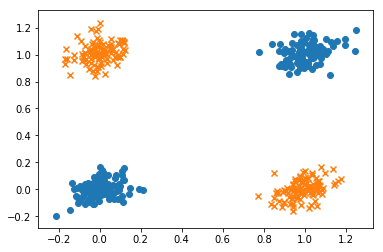

In [188]:
def generer_exemple(mean=0):
    """Genere un exemple"""
    cov = [[0.001, 0.005], [0.006, 0.003]] # plus que la covariance soit petite, plus que les points soient centralisées
    return np.random.multivariate_normal(mean, cov)

def generer_exemples(nombre_exemples, mean=0):
    """ Genere une liste de taille 'nombre_exemple' d'exemples """
    exemples = list()
    for _ in range(nombre_exemples):
        exemples.append(generer_exemple(mean))   
    return exemples

def ajouter_exemples_aleatoires(the_set, nombre_exemples, mean, labels):
    """ Ajoute dans 'the_set' un total de 'nombre_exemples' exemples
    associés aleatoirement à un label contenu dans 'labels'. """
    from random import choice
    exemples = generer_exemples(nombre_exemples, mean)
    for exemple in exemples:
        the_set.addExample(exemple, choice(labels))

set_appren= LabeledSet(2)
ajouter_exemples_aleatoires(set_appren, 100, [0,0], [1])
ajouter_exemples_aleatoires(set_appren, 100, [1,1], [1])
ajouter_exemples_aleatoires(set_appren, 100, [1,0], [-1])
ajouter_exemples_aleatoires(set_appren, 100, [0,1], [-1])

set_test= LabeledSet(2)
ajouter_exemples_aleatoires(set_test, 200, [0,0], [1])
ajouter_exemples_aleatoires(set_test, 200, [1,1], [1])
ajouter_exemples_aleatoires(set_test, 200, [1,0], [-1])
ajouter_exemples_aleatoires(set_test, 200, [0,1], [-1])
#Dessiner 
plot2DSet(set_appren)

0.5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


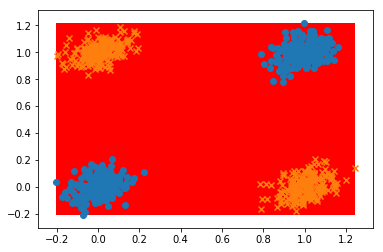

In [189]:
#Faire apprendre le modele
kp = Kernel_Perceptron(2,0.5,20,1)
kp.train(set_appren)
#Tester le modele
plot_frontiere(set_test,kp)
plot2DSet(set_test)
print(kp.accuracy(set_test))

0.86875


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


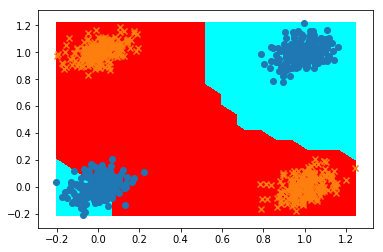

In [196]:
#Faire apprendre le modele
kp = Kernel_Perceptron(2,0.6,100,3)
kp.train(set_appren)
#Tester le modele
plot_frontiere(set_test,kp)
plot2DSet(set_test)
print(kp.accuracy(set_test))

1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


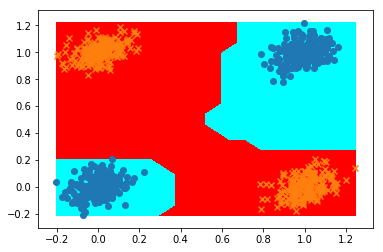

In [194]:
#Faire apprendre le modele
kp = Kernel_Perceptron(2,0.6,100,4)
kp.train(set_appren)
#Tester le modele
plot_frontiere(set_test,kp)
plot2DSet(set_test)
print(kp.accuracy(set_test))

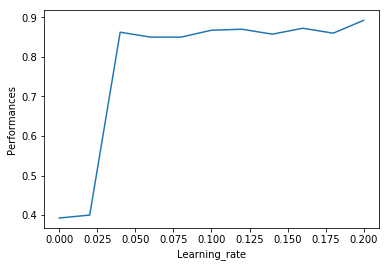

In [197]:
var_rate = 0
data_rate = []
index = []
while (var_rate < 0.20) :
    kp = Kernel_Perceptron(2,var_rate,100,3)
    kp.train(set_appren)
    data_rate.append(kp.accuracy(set_test))
    index.append(var_rate)
    var_rate +=0.02
df = pd.DataFrame({'Learning_rate':index, 'Performances' : data_rate})
plt.plot(df['Learning_rate'],df['Performances'])
plt.xlabel('Learning_rate')
plt.ylabel('Performances')
plt.show()

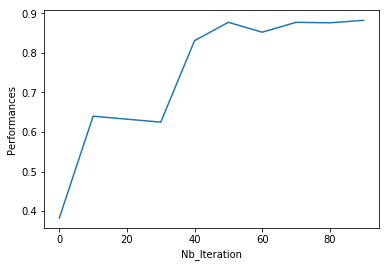

In [199]:
nb_Iteration = 0
data_nb = []
index = []
while (nb_Iteration < 100) :
    kp = Kernel_Perceptron(2,0.1,nb_Iteration,3)
    kp.train(set_appren)
    data_nb.append(kp.accuracy(set_test))
    index.append(nb_Iteration)
    nb_Iteration +=10
df = pd.DataFrame({'Nb_Iteration':index, 'Performances' : data_nb})
plt.plot(df['Nb_Iteration'],df['Performances'])
plt.xlabel('Nb_Iteration')
plt.ylabel('Performances')
plt.show()

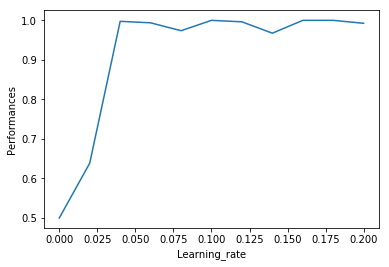

In [205]:
var_rate = 0
data_rate = []
index = []
while (var_rate < 0.20) :
    kp = Kernel_Perceptron(2,var_rate,100,4)
    kp.train(set_appren)
    data_rate.append(kp.accuracy(set_test))
    index.append(var_rate)
    var_rate +=0.02
df = pd.DataFrame({'Learning_rate':index, 'Performances' : data_rate})
plt.plot(df['Learning_rate'],df['Performances'])
plt.xlabel('Learning_rate')
plt.ylabel('Performances')
plt.show()

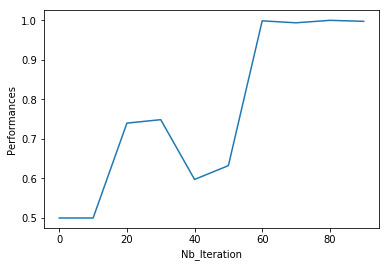

In [209]:
nb_Iteration = 0
data_nb = []
index = []
while (nb_Iteration < 100) :
    kp = Kernel_Perceptron(2,0.1,nb_Iteration,4)
    kp.train(set_appren)
    data_nb.append(kp.accuracy(set_test))
    index.append(nb_Iteration)
    nb_Iteration +=10
df = pd.DataFrame({'Nb_Iteration':index, 'Performances' : data_nb})
plt.plot(df['Nb_Iteration'],df['Performances'])
plt.xlabel('Nb_Iteration')
plt.ylabel('Performances')
plt.show()

## Conclusion Total : le problème de séparation non linéaire peux être traité par le changement de dimension, comme on l'a vu, nos points des données XOR ne peux pas résoudre dans deux dimensions, mais si on aura fait une transformation en 3 dimension ou 4 dimension, le problèm est bien résolu. De plus, les propriétés de hyper-paramètres ne sont pas changés ! Du coup, quand on trait les problèmes réelles non-linéaires, on pourra augumenter la dimension afin de faciliter notre problème. 